# Stress Detection With Machine Learning

Deteksi stress merupakan salah satu task dalam project ini. ada banyak kalimat yang bisa digunakan seseorang pada postingan merka yang bisa menunjukan apakah mereka mengalami stress psikologi atau tidak. Pada dataset ini kita dapat menggunakan untuk melatih model machine learning untuk stress detection. Dataset diperoleh dari kaggle yang berjumlah 116 atribut atau kolom. tapi kita hanya membutuhkan atribut text dan label atau kelas untuk project kita\
Dataset ini berisi data yang diposting yang terkait dengan kesehatan mental. Dataset ini memiliki label yang diklasifikasikan 1 sebagai **stress** dan 0 **tidak stress**

## 1. Import Library

Kita akan mengimport beberapa libray untuk project kita dalam membuat model machine learning

In [1]:
import pandas as pd # berfungsi sebagai pengolah data berbasis tabel
import numpy as np # berfungsi untuk melakukan operasi matematika
import nltk # berfungsi untuk melakukan proses NLP
import re # berfungsi untuk melakukan proses regular expression
from nltk.corpus import stopwords # berfungsi untuk menghapus kata-kata yang tidak penting
import string # berfungsi untuk menghapus tanda baca
import matplotlib.pyplot as plt # berfungsi untuk melakukan visualisasi data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # berfungsi untuk membuat wordcloud
from sklearn.feature_extraction.text import CountVectorizer # berfungsi untuk melakukan proses vectorisasi pada kalimat
from sklearn.model_selection import train_test_split # berfungsi untuk membagi data menjadi data training dan data testing
from sklearn.naive_bayes import BernoulliNB # berfungsi untuk melakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dengan varian BernoulliNB (Khusus Klasifikasi Biner)

## 2. Membaca Dataset

In [2]:
data = pd.read_csv('stress.csv') # membaca file csv dan disimpan dalam variabel data
data.head(10) # menampilkan 10 data pertama

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
5,relationships,7tx7et,"(30, 35)",I think he doesn't want to put in the effort f...,17554,1,1.0,1517274027,2,3.531124,...,1.000,1.1818,1.0,1.70415,1.44396,1.82046,0.75,5,4.338429,-0.550000
6,domesticviolence,7iphly,"[25, 30]",It was a big company so luckily I didn't have ...,165,0,0.8,1512854409,6,8.331463,...,1.000,1.1250,1.0,1.66985,1.57757,1.89926,0.88,29,8.394244,0.277381
7,anxiety,5m3k80,"(5, 10)",It cleared up and I was okay but. On Monday ...,33053,1,0.8,1483582174,1,0.403679,...,1.000,1.1429,1.0,1.69549,1.44860,1.88963,1.00,0,1.028654,-0.079630
8,relationships,7nhy1v,"(50, 55)",I actually give an assistant half my emergency...,7581,1,0.6,1514843984,134,5.381111,...,1.000,1.0000,1.0,1.73571,1.71471,1.93607,0.94,43,5.991049,-0.272917
9,assistance,61eiq6,"[15, 20]",I just feel like the street life has fucked my...,1517,1,1.0,1490428087,20,1.562351,...,1.000,1.1250,1.0,1.74956,1.67353,1.89320,0.80,6,2.851935,-0.117262


In [4]:
print(data.columns) # mengecek atribut atau kolom pada dataset
print(f'Jumlah Data : {len(data)}') # mengecek jumlah data pada dataset

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)
Jumlah Data : 2838


In [5]:
# mengecek jumlah data pada setiap kelas

data['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

In [7]:
# mengcek apakah dataset ini berisi data kosong atau tidak

print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


**Catatan**

Pada dataset ini memiliki atribut sebanyak 116 dengan jumlah data 2838 serta untuk pengecekan terhadap data yang null adalah kosong

## 3. Preprocessing

In [8]:
nltk.download('stopwords') # mengunduh stopwords dari nltk
stemmer = nltk.SnowballStemmer('english') # mengunduh stemmer berbahasa inggris dari nltk
stopword = set(stopwords.words('english')) # set stopwords berbahasa inggris

def clean(text): # fungsi untuk melakukan proses cleaning pada data
    text = str(text).lower() # mengubah semua huruf menjadi huruf kecil
    text = re.sub('\[*?\]', '', text) # menghapus tanda kurung siku
    text = re.sub('https?://\S=|www\.\S+', '', text) # menghapus link
    text = re.sub('<.*?>+', '', text) # menghapus tanda kurung siku
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # menghapus tanda baca
    text = re.sub('\n', '', text) # berfungsi menghapus karakter newline
    text = re.sub('\w*\d\w*', '', text) # menghapus angka
    text = [word for word in text.split(' ') if word not in stopword] # menghapus stopwords
    text = " ".join(text) # menggabungkan kembali kata-kata yang telah diproses
    text = [stemmer.stem(word) for word in text.split(" ")] # melakukan stemming
    text = " ".join(text) # menggabungkan kembali kata-kata yang telah diproses
    return text
data['text'] = data['text'].apply(clean) # memanggil fungsi clean pada kolom text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yudhaislamisulistya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


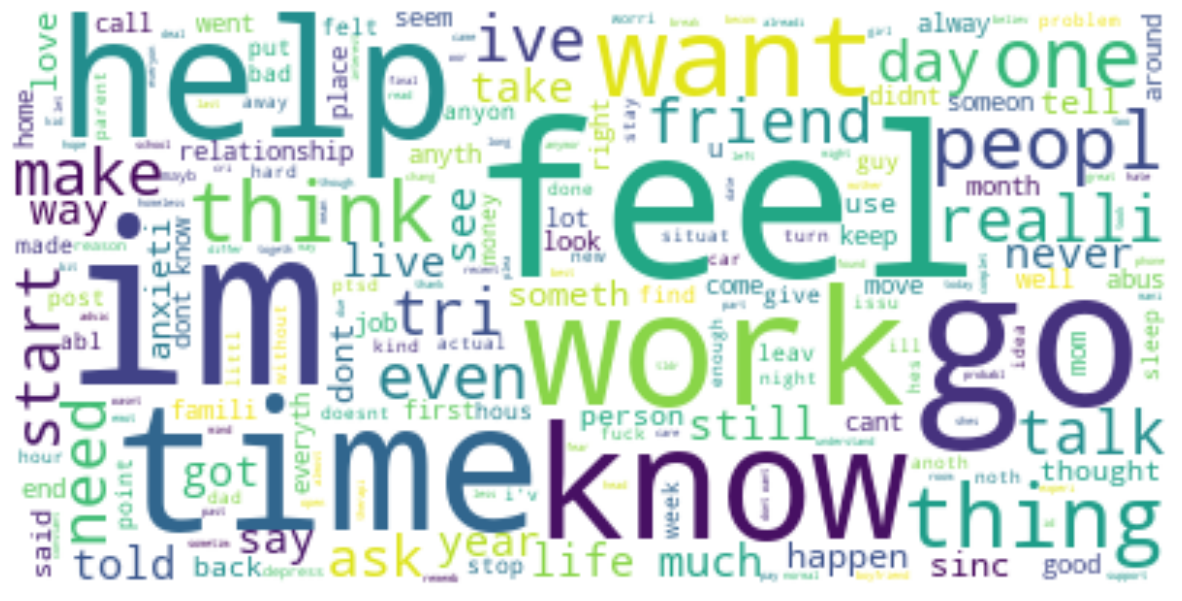

In [9]:
text = " ".join(i for i in data.text) # menggabungkan semua kata pada kolom text
stopword = set(STOPWORDS) # mengambil stopwords dari fungsi
wordcloud = WordCloud(stopwords=stopword, background_color="white").generate(text) # membuat wordcloud
plt.figure(figsize=(15,10)) # menentukan ukuran gambar
plt.imshow(wordcloud, interpolation='bilinear') # menampilkan gambar
plt.axis('off') # menghilangkan sumbu x dan y
plt.show() # menampilkan gambar

Bisa kita lihat ada gambar diatas bahwa ada beberapa kata yang sering muncul pada dataset ini seperti help, feel, time, know, want, go.

In [10]:
data['label'] = data['label'].map({0: "Bukan Stress", 1: "Stress"}) # mengubah label menjadi kategori
data = data[['text', 'label']] # mengubah urutan kolom

data.head(10) # menampilkan 10 data pertama

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,Bukan Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress
5,think doesnt want put effort relationship work...,Stress
6,big compani luckili didnt see time act though ...,Bukan Stress
7,clear okay monday think human brain work tri...,Stress
8,actual give assist half emerg fee come help so...,Stress
9,feel like street life fuck head there much don...,Stress


Diatas kita hanya memerlukan 2 atribut yang pertama adalah **text** sebagai variabel X atau predictor sedangkan **label** sebagai variabel y. Kedua atribut ini selanjutkan akan diproses untuk melatih sebuah model machine learning

## 4. Buat Model (Hasil Belajar)

Pertama kita akan membuat variabel X dan y sebagai text dan label, lalu kita vektorisasi kalimat pada variabel X setelah itu kita bagi data menjadi X_train, y_train, X_test, y_test yang nantinya bisa kita gunakan untuk melatih model

In [11]:
X = np.array(data['text']) # mengambil data pada kolom text lalu mengubah menjadi array
y = np.array(data['label']) # mengambil data pada kolom label lalu mengubah menjadi array

cv = CountVectorizer() # membuat objek CountVectorizer
X = cv.fit_transform(X) # melakukan proses vectorisasi pada data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # membagi data menjadi data training dan data testing sebanyak 33% untuk data testing dan 67% untuk data training

In [13]:
# membuat objek Naive Bayes

model = BernoulliNB() # menggunakan algoritma Naive Bayes dengan varian BernoulliNB (Khusus Klasifikasi Biner)
model.fit(X_train, y_train) # melakukan proses training pada data training

print(f'Akurasi : {model.score(X_test, y_test)}') # mengecek akurasi dari model yang telah dibuat

Akurasi : 0.7470651013874067


Akurasi yang dihasilkan ketika kita melatih model ini adalah kurang lebih sebesar 74% yang artinya model atau hasil belajar ini hanya mampu mendeteksi sebuah kalimat mengandung kalimat stress atau tidak sebesar 74%

In [16]:
user = input("Masukkan Kalimat : ") # meminta inputan dari user
data = cv.transform([user]).toarray() # melakukan proses vectorisasi pada inputan user
output = model.predict(data) # melakukan prediksi dengan model yang telah dibuat
print(output)

['Stress']


## 5. Conclusion

Bisa kita lihat, kita bisa melihat hasil yang baik dari model machine learning kita yang bisa mengenali kalimat stress atau tidak dari postingan sosial media. Model machine learning ini bisa lagi kita improve dengan menerapkan algoritma yang lain atau dengan jumlah data yang lebih hanyak